In [1]:
import os
if os.path.exists("/gss_gpfs_scratch/"):
    RMG_PY_PATH = os.path.expanduser('/gss_gpfs_scratch/westgroup/Importer/RMG-Py/')
    RMG_MODELS_PATH = os.path.expanduser('/gss_gpfs_scratch/westgroup/Importer/RMG-models')
else:
    RMG_PY_PATH = os.path.expanduser('~/Code/RMG-discovery/')
    RMG_MODELS_PATH = os.path.expanduser('~/Code/RMG-models')

In [2]:
import IPython
from IPython.display import display
import sys
import os
import re

sys.path.insert(1,RMG_PY_PATH) # a copy of RMG-Py on the `importer` branch.
from rmgpy.molecule import Molecule
import rmgpy.kinetics
import numpy
import cPickle as pickle
from collections import Counter, defaultdict
from rmgpy.reaction import Reaction
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import rmgpy.rmg
import rmgpy.data
import rmgpy.data.kinetics
import ck2cti
import numpy as np
import matplotlib.pyplot as plt
from rmgpy.species import Species

In [3]:
h = open("../reference_files/importerKinetics.pkl", "r")
importer_kinetics = pickle.load(h)
importer_kinetics = pd.DataFrame(importer_kinetics)
importer_kinetics

,CHCHCH3 + IC8H18 => C3H6 + IC8H17,CH2CCH3 + IC8H18 => C3H6 + IC8H17,CH2C3H5 + IC8H18 => NC4H8 + IC8H17,CH2OH + IC8H18 => CH3OH + IC8H17,DC5H11 + CO <=> IC5H11CO,HCCO + IC8H18 => CH2CO + IC8H17,C4H8CHO-1 + H2O <=> NC4H9CHO + OH,CH3CO + IC8H18 => CH3CHO + IC8H17,mf25oh + h <=> f2oh + ch3,mf25oh + h <=> mf2 + oh,...,C11OOH1-3O2 <=> C11OOH1-3 + O2,OHX + O2 <=> HO2 + O,C11OOH1-4O2 <=> C11OOH1-4 + O2,IC3H7OO + CYC6H8 => C3H7OOH + C6H6 + H,A2- + C4H4 <=> A3 + H,C11OOH2-1O2 <=> C11OOH2-1 + O2,CH3TXcC6H10 + O2 <=> CH3-1-cC6H9 + HO2,C11OOH3-2O2 <=> C11OOH3-2 + O2,SC4H7 + NC3H7OH => NC4H8 + CH3CHCH2OH,sc4h9o2 + c4h10 <=> sc4h9o2h + sc4h9
AramcoMech_1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.12e+13,'cm^3/(mol*s)'), n=0, Ea..."
AramcoMech_2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AutoTST-OOHabstraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biomass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chernov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CombFlame2012/2028-Sarathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.12e+13,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2013/1315-Chang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CombFlame2013/1541-Zhang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.12e+13,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2013/1609-Veloo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CombFlame2013/17-Malewicki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.12e+13,'cm^3/(mol*s)'), n=0, Ea..."


In [4]:
test_rxn = Reaction(reactants = [
    Species(molecule=[Molecule(SMILES="[H][H]")]), 
    Species(molecule=[Molecule(SMILES="[O]O")])], 
                    products=[
                        Species(molecule=[Molecule(SMILES="[H]")]), 
                        Species(molecule=[Molecule(SMILES="OO")])])
test_rxn

In [6]:
h2_kinetics = importer_kinetics.T[importer_kinetics.columns.map(test_rxn.isIsomorphic)].T.dropna()
h2_kinetics

,h2o2 + h <=> h2 + ho2
AramcoMech_1.3,"Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea..."
AramcoMech_2.0,"Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea..."
Biomass,"Arrhenius(A=(6.025e+13,'cm^3/(mol*s)'), n=0, E..."
Chernov,"Arrhenius(A=(1.69e+12,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2012/2028-Sarathy,"Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea..."
CombFlame2013/1315-Chang,"Arrhenius(A=(4.82e+13,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2013/1541-Zhang,"Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea..."
CombFlame2013/1609-Veloo,"Arrhenius(A=(6.05e+06,'cm^3/(mol*s)'), n=2, Ea..."
CombFlame2013/17-Malewicki,"Arrhenius(A=(4.82e+13,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2013/1907-Merchant,"Arrhenius(A=(4.82e+13,'cm^3/(mol*s)'), n=0, Ea..."


In [7]:
def RateCoefficients(arrhenius):
    """
    Takes an Arrhenius object, evaluates k at 1000K 1bar, and returns log10(k)
    """
    rate = np.nan
    try:
        rate = np.log10(arrhenius.getRateCoefficient(T=1000, P=1e5))
        #print "Rate Calculated"
    except:
        print "No rate to calculate"
        pass
    return rate

In [8]:
uniques = np.unique(h2_kinetics.applymap(RateCoefficients).get_values())

In [9]:
new_kinetics = h2_kinetics.applymap(RateCoefficients)
new_kinetics.columns = ["Reaction"]
new_kinetics

,Reaction
AramcoMech_1.3,6.021167
AramcoMech_2.0,6.021167
Biomass,6.042523
Chernov,5.407250
CombFlame2012/2028-Sarathy,6.021167
CombFlame2013/1315-Chang,5.945613
CombFlame2013/1541-Zhang,6.021167
CombFlame2013/1609-Veloo,5.645320
CombFlame2013/17-Malewicki,5.945613
CombFlame2013/1907-Merchant,5.945613


In [10]:
unique_list = []
for unique in uniques:
    print unique
    unique_list.append(new_kinetics[new_kinetics.Reaction == unique].index[0])
    print new_kinetics[new_kinetics.Reaction == unique].index[0]
    print
unique_list

5.40622026925
PCI2013/401-Liu

5.40725044825
Chernov

5.41090434644
CombFlame2013/487-Schenk

5.42183160744
PCI2013/297-Herbinet

5.64515413637
Narayanaswamy

5.64532023074
CombFlame2013/1609-Veloo

5.94560161211
PCI2017/025-Sudholt

5.94561253937
CombFlame2013/1315-Chang

5.94633929914
CombFlame2014/405-Cai

5.9463502264
GRI-mech-3.0

5.97095927122
CombFlame2015/3755-Konnov

6.02116714002
AramcoMech_1.3

6.04252255238
Biomass

6.06015272871
PCI2017/012-Felsmann



['PCI2013/401-Liu',
 'Chernov',
 'CombFlame2013/487-Schenk',
 'PCI2013/297-Herbinet',
 'Narayanaswamy',
 'CombFlame2013/1609-Veloo',
 'PCI2017/025-Sudholt',
 'CombFlame2013/1315-Chang',
 'CombFlame2014/405-Cai',
 'GRI-mech-3.0',
 'CombFlame2015/3755-Konnov',
 'AramcoMech_1.3',
 'Biomass',
 'PCI2017/012-Felsmann']

In [11]:
h2_kinetics.loc["AramcoMech_1.3"][0]

Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea=(6000,'cal/mol'), T0=(1,'K'))

In [12]:
f = open("../../autotst_kinetics.pkl","r")
autotst_kinetics = pickle.load(f)
ooh_reactions = []
for rxn in autotst_kinetics:
    reactants, products = rxn.label.split("_")
    r1, r2 = reactants.split('+')
    p1, p2 = products.split('+')
    if "OO" in [r1, r2, p1, p2] and "[O]O" in [r1, r2, p1, p2]:
        #print [r1, r2, p1, p2]
        ooh_reactions.append(rxn)

In [13]:
for reaction in ooh_reactions:
    if reaction.label == "OO+[H]_[H][H]+[O]O":
        print reaction.label
        h2_rxn = reaction
        
h2_rxn.label

OO+[H]_[H][H]+[O]O


'OO+[H]_[H][H]+[O]O'

In [14]:

h2_kinetics.loc["AutoTST"] = h2_rxn.kinetics
h2_kinetics

,h2o2 + h <=> h2 + ho2
AramcoMech_1.3,"Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea..."
AramcoMech_2.0,"Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea..."
Biomass,"Arrhenius(A=(6.025e+13,'cm^3/(mol*s)'), n=0, E..."
Chernov,"Arrhenius(A=(1.69e+12,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2012/2028-Sarathy,"Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea..."
CombFlame2013/1315-Chang,"Arrhenius(A=(4.82e+13,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2013/1541-Zhang,"Arrhenius(A=(2.15e+10,'cm^3/(mol*s)'), n=1, Ea..."
CombFlame2013/1609-Veloo,"Arrhenius(A=(6.05e+06,'cm^3/(mol*s)'), n=2, Ea..."
CombFlame2013/17-Malewicki,"Arrhenius(A=(4.82e+13,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2013/1907-Merchant,"Arrhenius(A=(4.82e+13,'cm^3/(mol*s)'), n=0, Ea..."


Chernov has a low reaction rate at HIGH temperatures

CombFlame2013/1609-Veloo has a low reaction rate at LOW temperatures

CombFlame2013/1939-Cai has a low reaction rate at LOW temperatures

CombFlame2013/487-Schenk has a low reaction rate at HIGH temperatures

CombFlame2014/1135-Dames has a low reaction rate at LOW temperatures

CombFlame2014/657-Jin has a low reaction rate at LOW temperatures

CombFlame2014/84-Wang has a low reaction rate at LOW temperatures

Narayanaswamy has a low reaction rate at LOW temperatures

PCI2013/297-Herbinet has a low reaction rate at HIGH temperatures

PCI2013/325-Husson has a low reaction rate at HIGH temperatures

PCI2013/401-Liu has a low reaction rate at HIGH temperatures

PCI2013/599-Veloo has a low reaction rate at LOW temperatures

PCI2015/0325-Nawdiyal has a low reaction rate at HIGH temperatures

PCI2017/047-Rodriguez has a low reaction rate at HIGH temperatures

USC_Mech_ii has a low reaction rate at LOW temperatures



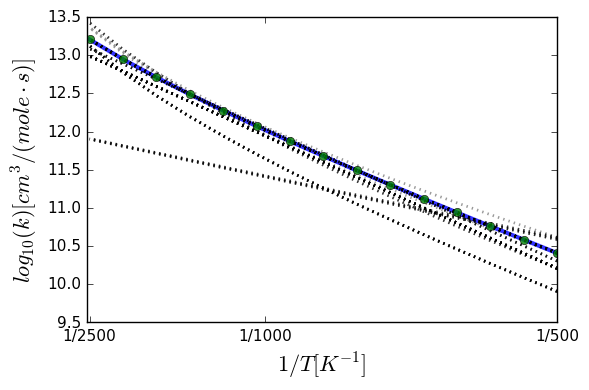

In [20]:
import numpy as np
from rmgpy.reaction import _isomorphicSpeciesList
from cycler import cycler
inverseTemps = np.linspace(1000./500., 1000./2500., 15)
Temps = 1000./inverseTemps
#Temps = np.linspace(500, 2500, 17)
#inverseTemps = 1000./Temps


comparisonPressure = 1e5 # Pa


fig, ax = plt.subplots()
#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +cycler('linestyle', ['-', '--', ':', '-.'])))
for index in h2_kinetics.index:
    #print index
    logk = []
    logkAutoTST = []
    kinetics = h2_kinetics.loc[index][0]

    if index == 'AutoTST':
        continue

        for Temp in Temps:
            k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
            logkAutoTST.append(np.log10(k) + 6)

        plt.plot(inverseTemps, logkAutoTST, '-r', linewidth=3, alpha=0.9)



    elif index == 'CombFlame2012/2028-Sarathy':
        

        for Temp in Temps:
            k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
            logkAutoTST.append(np.log10(k) + 6)

        plt.plot(inverseTemps, logkAutoTST, '-b', linewidth=3, alpha=0.8)

    elif index == 'n-Heptane':
        

        for Temp in Temps:
            k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
            logkAutoTST.append(np.log10(k) + 6)

        plt.plot(inverseTemps, logkAutoTST, 'og', linewidth=3, alpha=0.8)

    else:
        for Temp in Temps:
            k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
            logk.append(np.log10(k) + 6)
            if Temp == 2500 and np.log10(k)+6 < 12:
                print "{} has a low reaction rate at HIGH temperatures".format(index)
                print
                
            if Temp == 500 and np.log10(k)+6 < 10:
                print "{} has a low reaction rate at LOW temperatures".format(index)
                print
        plt.plot(inverseTemps, logk, ":k", linewidth=2, alpha=0.4,  label=index)
        
plt.xlabel("$1/T [K^{-1}]$", fontsize=16)
plt.ylabel("$log_{10}(k) [cm^3 / (mole \cdot s)]$", fontsize=16)
#label = autotst_rxn.label

Tticks = [500, 1000, 2500]
ax.set_xticks([1000./T for T in Tticks])
ax.set_xticklabels(['1/{:.0f}'.format(T) for T in Tticks])
plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)
#plt.title(label)
plt.xlim([0.39,2])

plt.ylim(max([ax.get_ylim()[0], 0]), min([ax.get_ylim()[1], 15]))
#saveString = os.path.join("../reference_files/", str(autotst_rxn) + '.pdf')
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc = 4)
plt.savefig("h2_second_abstraction.pdf")
#print str(label)
plt.show() 



In [16]:
Temps

array([  500.        ,   530.3030303 ,   564.51612903,   603.44827586,
         648.14814815,   700.        ,   760.86956522,   833.33333333,
         921.05263158,  1029.41176471,  1166.66666667,  1346.15384615,
        1590.90909091,  1944.44444444,  2500.        ])